# Age Recognition

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from hw_kernels import KernelizedRidgeRegression, SVR, RBF
from age_recognition import load_utkface_data, NaiveImageKernel, LBPKernel, plot_all_predictions, plot_error_distribution
import matplotlib.pyplot as plt

In [2]:
print("Loading UTKFace data...")
X, y = load_utkface_data('UTKFace', max_samples=7000)


Loading UTKFace data...


Processing images: 100%|██████████| 7000/7000 [00:04<00:00, 1565.47it/s]


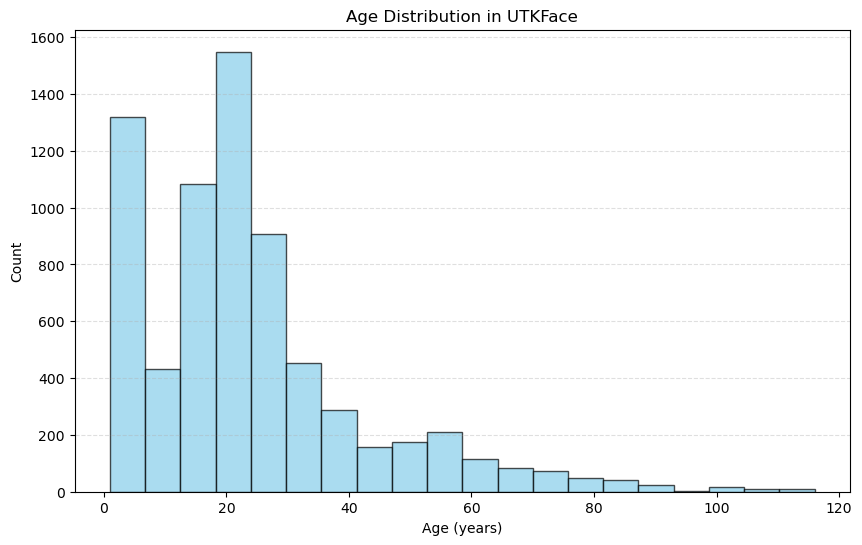

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
plt.figure(figsize=(10, 6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution in UTKFace')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [4]:
kernels = {
    'Naive RBF': NaiveImageKernel(RBF(sigma=0.1)),
    'LBP': LBPKernel(sigma=0.1, radius=2, n_points=8)
}

models = {
    'Naive RBF SVR': SVR(kernels['Naive RBF'], lambda_=0.01, epsilon=0.5),
    'LBP SVR': SVR(kernels['LBP'], lambda_=0.01, epsilon=0.5)
}

print("\nTraining models...")
trained_models = {}
for name, model in models.items():
    print(f"- Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model



Training models...
- Training Naive RBF SVR...


Computing kernel: 100%|██████████| 1/1 [01:46<00:00, 106.50s/it]


     pcost       dcost       gap    pres   dres
 0: -1.4354e+06 -4.6333e+07  4e+07  4e-11  4e-16
 1: -3.3370e+06 -8.8205e+06  5e+06  2e-11  3e-16
 2: -5.5598e+06 -6.3595e+06  8e+05  9e-12  2e-16
 3: -5.9909e+06 -6.1241e+06  1e+05  9e-12  2e-16
 4: -6.0642e+06 -6.0758e+06  1e+04  3e-11  2e-16
 5: -6.0710e+06 -6.0712e+06  1e+02  9e-11  2e-16
 6: -6.0711e+06 -6.0711e+06  2e+00  9e-11  2e-16
Optimal solution found.
- Training LBP SVR...


Computing distances: 100%|██████████| 4900/4900 [00:03<00:00, 1575.54it/s]


     pcost       dcost       gap    pres   dres
 0: -3.8790e+05 -2.8843e+07  3e+07  3e-11  4e-13
 1: -8.2457e+05 -4.6311e+06  4e+06  3e-12  5e-13
 2: -9.7040e+05 -1.5972e+06  6e+05  5e-13  5e-13
 3: -1.0832e+06 -1.2211e+06  1e+05  2e-11  3e-13
 4: -1.1392e+06 -1.1668e+06  3e+04  7e-12  2e-13
 5: -1.1461e+06 -1.1497e+06  4e+03  3e-12  1e-13
 6: -1.1469e+06 -1.1472e+06  3e+02  2e-12  1e-13
 7: -1.1470e+06 -1.1470e+06  7e+00  3e-12  1e-13
 8: -1.1470e+06 -1.1470e+06  4e-01  4e-13  1e-13
Optimal solution found.



Generating plots...


Computing distances: 100%|██████████| 2100/2100 [00:00<00:00, 4639.79it/s]


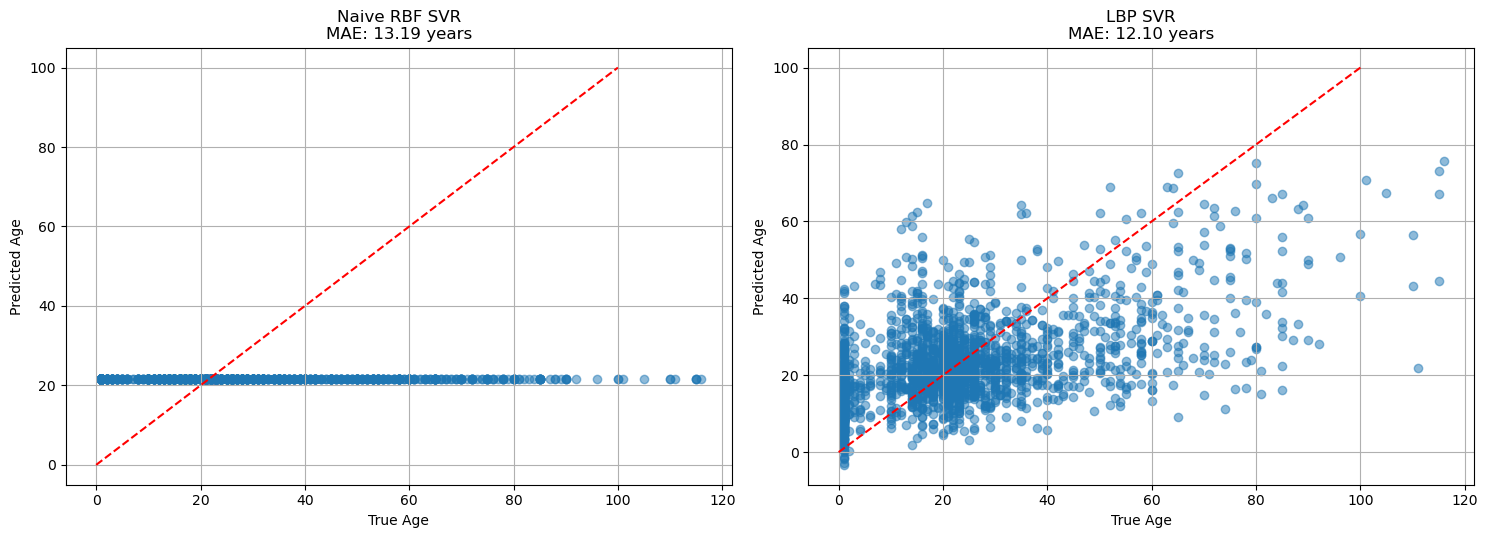

In [5]:
print("\nGenerating plots...")
plot_all_predictions(trained_models, X_test, y_test)

Computing distances: 100%|██████████| 2100/2100 [00:00<00:00, 4929.59it/s]


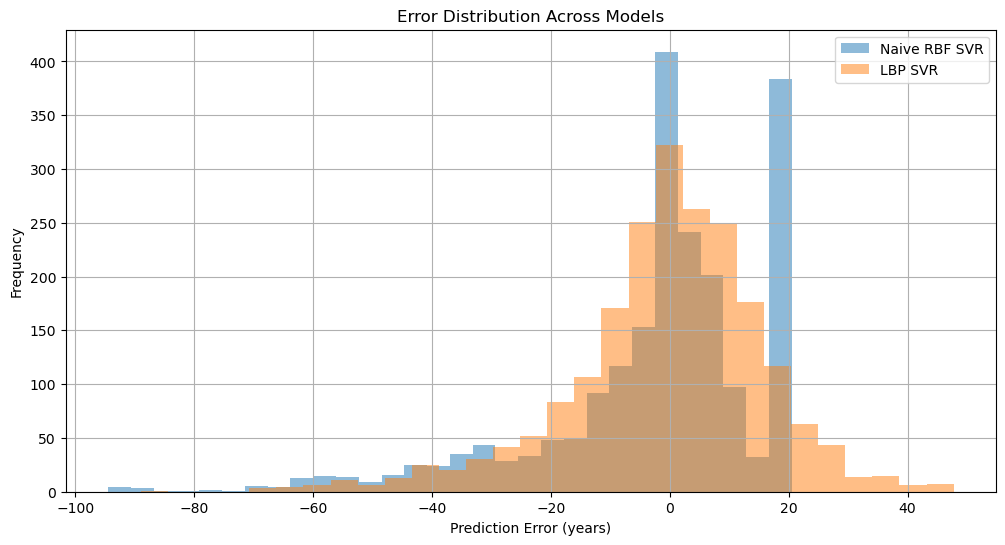

In [6]:
plot_error_distribution(trained_models, X_test, y_test)